<center><h3>Predict The Price of Books</h3></center>

### Load all libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder as le ,MinMaxScaler, RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV, cross_val_score, KFold, learning_curve
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

## Load Dataset

In [7]:
train = pd.read_excel("C:/Users/ac/Data Science/Projects and Hackathons/Hackathon 2/Data_Train.xlsx")
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [8]:
test = pd.read_excel("C:/Users/ac/Data Science/Projects and Hackathons/Hackathon 2/Data_Test.xlsx")
test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [9]:
print('Train data contains', train.shape[0], 'rows and', train.shape[1], 'columns')
print('Test data contains', test.shape[0], 'rows and', test.shape[1], 'columns')

Train data contains 6237 rows and 9 columns
Test data contains 1560 rows and 8 columns


## Merging both the datasets for EDA

In [10]:
df = pd.concat([test.assign(ind="test"), train.assign(ind="train")])

In [11]:
df

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,ind,Price
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery",test,NaN
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media",test,NaN
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance,test,NaN
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media",test,NaN
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing",test,NaN
...,...,...,...,...,...,...,...,...,...,...
6232,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,"Paperback,– 8 Aug 2018",5.0 out of 5 stars,2 customer reviews,'F*cking brilliant' Sarah Knight\n'Very funny'...,Anthropology (Books),Humour,train,322.0
6233,The Chemist,Stephenie Meyer,"Paperback,– 21 Nov 2016",3.3 out of 5 stars,9 customer reviews,"In this gripping page-turner, an ex-agent on t...",Contemporary Fiction (Books),"Crime, Thriller & Mystery",train,421.0
6234,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,"Paperback,– 8 Jun 2006",3.8 out of 5 stars,3 customer reviews,'The most refreshing and radiant love story yo...,Romance (Books),Romance,train,399.0
6235,Frostfire (Kanin Chronicles),Amanda Hocking,"Paperback,– 15 Jan 2015",3.5 out of 5 stars,4 customer reviews,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure (Books),Action & Adventure,train,319.0


## Basic Dataset information

In [12]:
df.shape

(7797, 10)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7797 entries, 0 to 6236
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         7797 non-null   object 
 1   Author        7797 non-null   object 
 2   Edition       7797 non-null   object 
 3   Reviews       7797 non-null   object 
 4   Ratings       7797 non-null   object 
 5   Synopsis      7797 non-null   object 
 6   Genre         7797 non-null   object 
 7   BookCategory  7797 non-null   object 
 8   ind           7797 non-null   object 
 9   Price         6237 non-null   float64
dtypes: float64(1), object(9)
memory usage: 670.1+ KB


In [14]:
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print(cat_cols)

num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
print(num_cols)

['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre', 'BookCategory', 'ind']
['Price']


In [15]:
df.describe(percentiles=[0.01, 0.02,0.03, 0.04, 0.05, 0.1, .25, .5, .75, .9, .95, .96, .97, .98, .99])

,Price
count,6237.000000
mean,560.707516
std,690.110657
min,25.000000
1%,68.360000
2%,90.000000
3%,100.000000
4%,114.000000
5%,123.000000
10%,166.252000


In [16]:
df.describe(include=object) 

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,ind
count,7797,7797,7797,7797,7797,7797,7797,7797,7797
unique,6787,4372,3882,36,368,6771,363,11,2
top,Casino Royale: James Bond 007 (Vintage),Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,A Tinkle Double Digest is two Tinkle Digests i...,Action & Adventure (Books),Action & Adventure,train
freq,4,87,60,1751,1328,8,1183,1036,6237


## Converting the data in Lower case

In [17]:
def to_lower(df,cols):
    for col in cols:
        df[col] = df[col].str.lower()

In [18]:
cols = ['Title','Author','Edition','Synopsis','Genre','BookCategory']

to_lower(df,cols)

## Null Value Treatment

In [19]:
df.isnull().sum()

Title              0
Author             0
Edition            0
Reviews            0
Ratings            0
Synopsis           0
Genre              0
BookCategory       0
ind                0
Price           1560
dtype: int64

## EDA

In [20]:
# extrating only the review from the "Reviews" column
df['Reviews'] = df.Reviews.apply(lambda r: float(r.split()[0]))

In [21]:
# extracting only ratings from the "Rating" column
df['Ratings']= df.Ratings.str.extract('(\d+)')
# changing the data type of Ratings column
df["Ratings"] = df.Ratings.astype(float)

In [22]:
# removing words books and textbooks from columns "Genre"
df.Genre = df.Genre.apply(lambda x: x.strip('(books)').strip('Textbooks'))

In [23]:
# 'Extracting' year of publish from the `Edition` column
df['Edition_Year'] = df['Edition'].apply(lambda x: x.split()[-1] if x.split()[-1].isdigit() else 'na')

In [24]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,ind,Price,Edition_Year
0,the complete sherlock holmes: 2 boxes sets,sir arthur conan doyle,"mass market paperback,– 1 oct 1986",4.4,960.0,a collection of entire body of work of the she...,hort stories,"crime, thriller & mystery",test,NaN,1986
1,learn docker - fundamentals of docker 18.x: ev...,gabriel n. schenker,"paperback,– import, 26 apr 2018",5.0,1.0,enhance your software deployment workflow usin...,perating systems,"computing, internet & digital media",test,NaN,2018
2,big girl,danielle steel,"paperback,– 17 mar 2011",5.0,4.0,"'watch out, world. here i come!'\nfor victoria...",romance,romance,test,NaN,2011
3,think python: how to think like a computer sci...,allen b. downey,"paperback,– 2016",4.1,11.0,"if you want to learn how to program, working w...",programming & software development,"computing, internet & digital media",test,NaN,2016
4,oxford word skills: advanced - idioms & phrasa...,redman gairns,"paperback,– 26 dec 2011",4.4,9.0,"learn and practise the verbs, prepositions and...",linguistics,"language, linguistics & writing",test,NaN,2011


In [25]:
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print(cat_cols)

num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
print(num_cols)

['Title', 'Author', 'Edition', 'Synopsis', 'Genre', 'BookCategory', 'ind', 'Edition_Year']
['Reviews', 'Ratings', 'Price']


## Train-Test Split

In [26]:
test, train = df[df["ind"].eq("test")], df[df["ind"].eq("train")]

In [27]:
train.drop("ind",axis=1,inplace=True)

In [28]:
train.shape

(6237, 10)

In [29]:
train.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price', 'Edition_Year'],
      dtype='object')

In [30]:
test.drop(columns=["ind", "Price"],inplace=True,index=1)

In [31]:
test.shape

(1559, 9)

In [32]:
test.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Edition_Year'],
      dtype='object')

## Outlier Treatment in Train Dataset

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6237 entries, 0 to 6236
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   float64
 4   Ratings       6237 non-null   float64
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
 9   Edition_Year  6237 non-null   object 
dtypes: float64(3), object(7)
memory usage: 536.0+ KB


In [34]:
train.describe(percentiles=[0.01, 0.02,0.03, 0.04, 0.05, 0.1, .25, .5, .75, .9, .95, .96, .97, .98, .99])

,Reviews,Ratings,Price
count,6237.000000,6237.000000,6237.000000
mean,4.293202,29.828122,560.707516
std,0.662501,84.139256,690.110657
min,1.000000,1.000000,25.000000
1%,2.000000,1.000000,68.360000
2%,2.500000,1.000000,90.000000
3%,3.000000,1.000000,100.000000
4%,3.000000,1.000000,114.000000
5%,3.000000,1.000000,123.000000
10%,3.500000,1.000000,166.252000


{'whiskers': [<matplotlib.lines.Line2D at 0x207470b2790>,
 'caps': [<matplotlib.lines.Line2D at 0x207470b2e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x207470b2430>],
 'medians': [<matplotlib.lines.Line2D at 0x207470c3550>],
 'fliers': [<matplotlib.lines.Line2D at 0x207470c38e0>],
 'means': []}

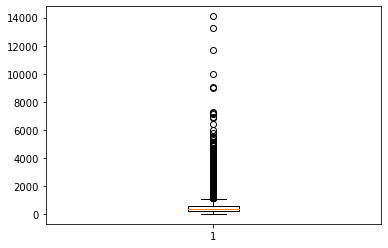

In [35]:
plt.boxplot(train["Price"])

#### By observing the graph above, it can be seen that there are quite a lot of outliers, so we need to remove them

In [36]:
# we will use capping method to cap the outliers in the Price column
train["Price"]=np.where(train["Price"]>3403.360000, 3403.360000, train["Price"])

In [37]:
train.describe()

,Reviews,Ratings,Price
count,6237.000000,6237.000000,6237.000000
mean,4.293202,29.828122,542.061414
std,0.662501,84.139256,533.592329
min,1.000000,1.000000,25.000000
25%,4.000000,2.000000,249.180000
50%,4.400000,6.000000,373.000000
75%,4.800000,21.000000,599.000000
max,5.000000,973.000000,3403.360000


{'whiskers': [<matplotlib.lines.Line2D at 0x2074717bcd0>,
 'caps': [<matplotlib.lines.Line2D at 0x20747187400>,
 'boxes': [<matplotlib.lines.Line2D at 0x2074717b970>],
 'medians': [<matplotlib.lines.Line2D at 0x20747187ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20747187e20>],
 'means': []}

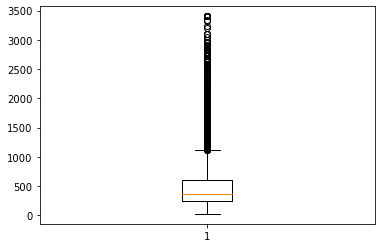

In [38]:
plt.boxplot(train["Price"])

## Outlier Treatment in Test Dataset

In [39]:
train.describe(percentiles=[0.01, 0.02,0.03, 0.04, 0.05, 0.1, .25, .5, .75, .9, .95, .96, .97, .98, .99])

,Reviews,Ratings,Price
count,6237.000000,6237.000000,6237.000000
mean,4.293202,29.828122,542.061414
std,0.662501,84.139256,533.592329
min,1.000000,1.000000,25.000000
1%,2.000000,1.000000,68.360000
2%,2.500000,1.000000,90.000000
3%,3.000000,1.000000,100.000000
4%,3.000000,1.000000,114.000000
5%,3.000000,1.000000,123.000000
10%,3.500000,1.000000,166.252000


#### The outliers are not that prominent in Test dataset, so we will not treat them

### Removing Unwanted columns

In [40]:
train.describe(include=object) 

,Title,Author,Edition,Synopsis,Genre,BookCategory,Edition_Year
count,6237,6237,6237,6237,6237,6237,6237
unique,5564,3670,3370,5548,341,11,57
top,a game of thrones (a song of ice and fire),agatha christie,"paperback,– 5 oct 2017",a tinkle double digest is two tinkle digests i...,action & adventure,action & adventure,2018
freq,4,69,48,8,947,818,811


In [41]:
train.drop(columns=["Title", "Synopsis", "Edition"], inplace=True, axis=1)

In [42]:
train.columns

Index(['Author', 'Reviews', 'Ratings', 'Genre', 'BookCategory', 'Price',
       'Edition_Year'],
      dtype='object')

In [43]:
test.drop(columns=["Title", "Synopsis", "Edition"], inplace=True, axis=1)

In [44]:
test.columns

Index(['Author', 'Reviews', 'Ratings', 'Genre', 'BookCategory',
       'Edition_Year'],
      dtype='object')

## LABEL ENCODING IN TRAIN DATASET

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6237 entries, 0 to 6236
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Author        6237 non-null   object 
 1   Reviews       6237 non-null   float64
 2   Ratings       6237 non-null   float64
 3   Genre         6237 non-null   object 
 4   BookCategory  6237 non-null   object 
 5   Price         6237 non-null   float64
 6   Edition_Year  6237 non-null   object 
dtypes: float64(3), object(4)
memory usage: 389.8+ KB


In [46]:
train["Author_label_encoded"]=LabelEncoder().fit_transform(train.Author)
train["Genre_label_encoded"]=LabelEncoder().fit_transform(train.Genre)
train["BookCategory_label_encoded"]=LabelEncoder().fit_transform(train.BookCategory)
train["Edition_Year_label_encoded"]=LabelEncoder().fit_transform(train.Edition_Year)

In [47]:
train1=train.drop(columns=["Author", "BookCategory","Genre", "Edition_Year"])

In [48]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6237 entries, 0 to 6236
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Reviews                     6237 non-null   float64
 1   Ratings                     6237 non-null   float64
 2   Price                       6237 non-null   float64
 3   Author_label_encoded        6237 non-null   int32  
 4   Genre_label_encoded         6237 non-null   int32  
 5   BookCategory_label_encoded  6237 non-null   int32  
 6   Edition_Year_label_encoded  6237 non-null   int32  
dtypes: float64(3), int32(4)
memory usage: 292.4 KB


## LABEL ENCODING IN TEST DATASET

In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559 entries, 0 to 1559
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Author        1559 non-null   object 
 1   Reviews       1559 non-null   float64
 2   Ratings       1559 non-null   float64
 3   Genre         1559 non-null   object 
 4   BookCategory  1559 non-null   object 
 5   Edition_Year  1559 non-null   object 
dtypes: float64(2), object(4)
memory usage: 85.3+ KB


In [50]:
test["Author_label_encoded"]=LabelEncoder().fit_transform(test.Author)
test["Genre_label_encoded"]=LabelEncoder().fit_transform(test.Genre)
test["BookCategory_label_encoded"]=LabelEncoder().fit_transform(test.BookCategory)
test["Edition_Year_label_encoded"]=LabelEncoder().fit_transform(test.Edition_Year)

In [51]:
test1=test.drop(columns=["Author", "BookCategory","Genre", "Edition_Year"])

In [52]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559 entries, 0 to 1559
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Reviews                     1559 non-null   float64
 1   Ratings                     1559 non-null   float64
 2   Author_label_encoded        1559 non-null   int32  
 3   Genre_label_encoded         1559 non-null   int32  
 4   BookCategory_label_encoded  1559 non-null   int32  
 5   Edition_Year_label_encoded  1559 non-null   int32  
dtypes: float64(2), int32(4)
memory usage: 60.9 KB


## RUNNING MODEL

In [56]:
from scipy.stats import boxcox
X = train1.drop('Price', axis =1)
y, param = boxcox(train1.Price)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error

# Spot check algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LA', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('KNR', KNeighborsRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

from sklearn.metrics import mean_absolute_error

# Evaluate each model
results = []
names = []
for name, model in models:
  model.fit(X_train, y_train)
  predictions = model.predict(X_val)
  cv_results = mean_absolute_error(y_val, predictions)
  results.append(cv_results)
  names.append(name)
  msg = '%s : %f '% (name, cv_results)
  print(msg)

LR : 0.286392 
LA : 0.290295 
EN : 0.289840 
DTR : 0.340987 
KNR : 0.281813 
RFR : 0.248725 
ETR : 0.257087 


In [58]:
# Final model
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [59]:
predictions = knn.predict(test1)

In [60]:
np.set_printoptions(precision=2)
df = pd.DataFrame({'Price':predictions})

In [61]:
df.to_csv('Predictions.csv', index=False)

In [62]:
p = pd.read_csv('Predictions.csv')
p

,Price
0,3.677599
1,4.484331
2,4.614887
3,3.875942
4,4.678418
...,...
1554,4.490478
1555,4.290269
1556,4.608933
1557,4.325188
